In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
train_dir = "/kaggle/input/firedataset-jpg-224/FireDataset-V6-JPG-Reshaped224/train"
val_dir = "/kaggle/input/firedataset-jpg-224/FireDataset-V6-JPG-Reshaped224/val"
test_dir = "/kaggle/input/firedataset-jpg-224/FireDataset-V6-JPG-Reshaped224/test"


In [3]:
# Data Augmentation for more data samples
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [4]:
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
# Load Images in Batches
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode="binary")

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode="binary")

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode="binary", shuffle=False)


Found 4014 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 524 images belonging to 2 classes.


In [6]:
# Loading Mobilenet V2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers (for transfer learning)
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  
x = Dense(1, activation="sigmoid")(x)  


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [8]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 18,314,817 (69.87 MB)

 Trainable params: 16,056,833 (61.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1 
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 94s 631ms/step - accuracy: 0.8289 - loss: 3.5213 - val_accuracy: 0.9593 - val_loss: 0.1465
Epoch 2/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 329ms/step - accuracy: 0.9388 - loss: 0.1613 - val_accuracy: 0.9492 - val_loss: 0.1449
Epoch 3/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.9550 - loss: 0.1262 - val_accuracy: 0.9512 - val_loss: 0.1580
Epoch 4/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 330ms/step - accuracy: 0.9510 - loss: 0.1316 - val_accuracy: 0.9654 - val_loss: 0.1166
Epoch 5/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 332ms/step - accuracy: 0.9598 - loss: 0.1186 - val_accuracy: 0.9736 - val_loss: 0.0897
Epoch 6/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 44s 329ms/step - accuracy: 0.9664 - loss: 0.0943 - val_accuracy: 0.9675 - val_loss: 0.1065
Epoch 7/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 323ms/step - accuracy: 0.9699 - loss: 0.0811 - val_accuracy: 0.9776 - val_loss: 0.0899
Epoch 8/15
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 326ms/step - accuracy: 0.9714 - loss: 0.0773 - val

In [27]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9543 - loss: 0.0833
Test Accuracy: 96.37%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


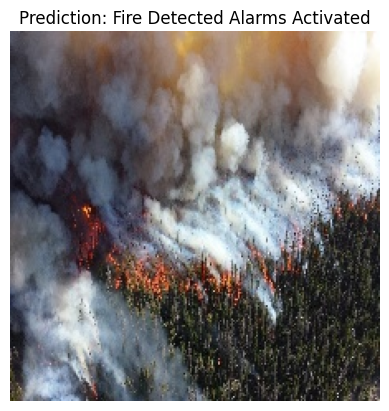

In [31]:

import matplotlib.pyplot as plt
img_path = "/kaggle/input/firedataset-jpg-224/FireDataset-V6-JPG-Reshaped224/test/fire/fire_image_1358.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (224, 224))  #
img_array = np.expand_dims(img_resized, axis=0) / 255.0  # Normalize


prediction = model.predict(img_array)[0][0]
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {'Fire Detected Alarms Activated'if prediction < 0.5 else 'No fire detected'}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


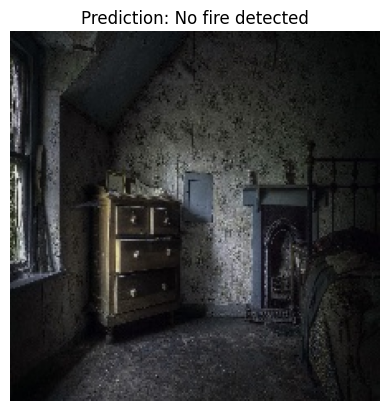

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = "/kaggle/input/firedataset-jpg-224/FireDataset-V6-JPG-Reshaped224/test/non_fire/nonfire_image_1448.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (224, 224))  #
img_array = np.expand_dims(img_resized, axis=0) / 255.0  # Normalize


prediction = model.predict(img_array)[0][0]
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {'Fire Deteced Alarm Activated'if prediction < 0.5 else 'No fire detected'}")
plt.show()


In [36]:
model.save("fire_detection_mobilenet.h5")
